#                                  The Battle of Neighborhoods (Week 2)


### Import all the libraries

In [1]:
import json
import folium
import random
import urllib
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from bs4 import BeautifulSoup
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
from IPython.display import Image
from sklearn.cluster import KMeans
from IPython.core.display import HTML
from IPython.core.interactiveshell import InteractiveShell
print('All the libraries are succeeded loading!')

All the libraries are succeeded loading!


### Download the new york dataset from the internet

In [2]:
with open('C:/Users/jrwei/Desktop/week5/ny_geo.json') as NY:
    ny_data = json.load(NY)
neigh = ny_data['features']

In [3]:
col_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude']
neighborhoods = pd.DataFrame(columns=col_names)

for data in neigh:
    borough = data['properties']['borough']
    name = data['properties']['name']
    coordinates = data['geometry']['coordinates']
    lat = coordinates[1]
    lng = coordinates[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': name,
                                          'Latitude': lat,
                                          'Longitude': lng}, ignore_index=True)

neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [4]:
man = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
man.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [5]:
print('We now have {} neighborhoods in the borough of Manhattan, NY.'.format(man.shape[0]))

We now have 40 neighborhoods in the borough of Manhattan, NY.


### Explore the Manhattan neighborhood map using Folium

In [6]:
add = 'Manhattan, NY'
geolocator = Nominatim(user_agent="nyjr")
location = geolocator.geocode(add)
latitude = location.latitude
longitude = location.longitude
print('The coordinates of Manhattan are {}, {}.'.format(latitude, longitude))

The coordinates of Manhattan are 40.7896239, -73.9598939.


In [7]:
map_man = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(man['Latitude'], man['Longitude'], man['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='orange',
        fill_opacity=0.7,
        parse_html=False).add_to(map_man)  
    
map_man

### Scrap the avarage rent price from the RENTCafe

In [8]:
price = requests.get("https://www.rentcafe.com/average-rent-market-trends/us/ny/manhattan/")
soup = BeautifulSoup(price.content,'lxml')
table = soup.find_all('table')[2]
df = pd.read_html(str(table))
rent_df = pd.DataFrame(df[0])
rent_df

,Neighborhood,Average Rent
0,Marble Hill,"$1,708"
1,Washington Heights,"$2,284"
2,Inwood,"$2,375"
3,Randalls and Wards Islands,"$2,394"
4,Harlem,"$2,948"
5,East Harlem,"$2,965"
6,Roosevelt Island,"$3,416"
7,Stuyvesant Town,"$3,611"
8,Liberty Island,"$3,648"
9,Governors Island,"$3,648"


In [9]:
# convert str type currency to float type
def convert_currency(var):
    new_value = var.replace(",","").replace("$","")
    return float(new_value)

D:\Software\Productivity\conda3\lib\site-packages\seaborn\categorical.py:3695: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


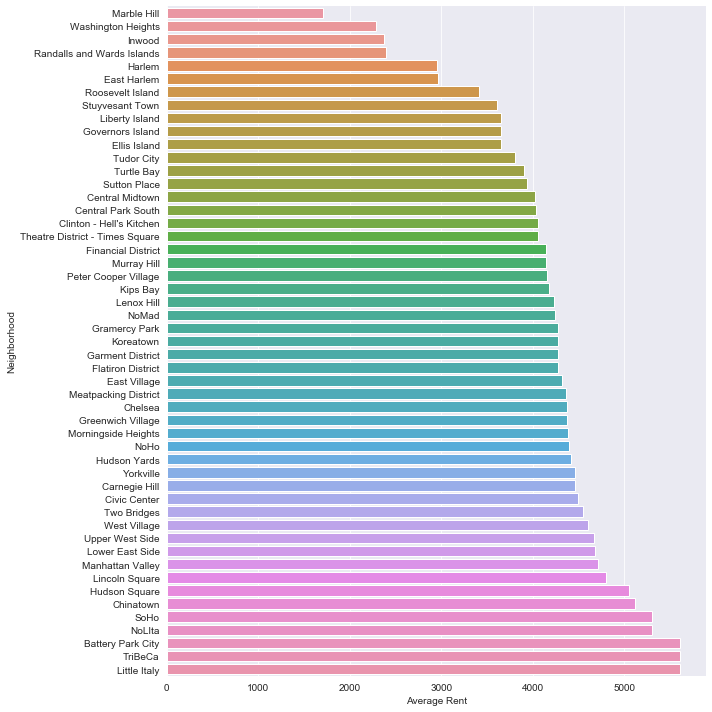

In [10]:
float_rent = rent_df['Average Rent'].apply(convert_currency)
rent_df['Average Rent'] = float_rent
sns.set_style('darkgrid')
sns.catplot(data=rent_df, y='Neighborhood', x='Average Rent',kind='bar',size=10)
plt.show()

### Explore the neigbourhoods in Manhattan through Foursquare API

In [11]:
CLIENT_ID = your Foursquare ID
CLIENT_SECRET = your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 500
radius = 5000

In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000, categoryIds=''):
    try:
        venues_list=[]
        for name, lat, lng in zip(names, latitudes, longitudes):
            print(name)

            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)

            if (categoryIds != ''):
                url = url + '&categoryId={}'
                url = url.format(categoryIds)

            # make the GET request
            response = requests.get(url).json()
            results = response["response"]['venues']

            # return only relevant information for each nearby venue
            for v in results:
                success = False
                try:
                    category = v['categories'][0]['name']
                    success = True
                except:
                    pass

                if success:
                    venues_list.append([(
                        name, 
                        lat, 
                        lng, 
                        v['name'], 
                        v['location']['lat'], 
                        v['location']['lng'],
                        v['categories'][0]['name']
                    )])

        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',  
                  'Venue Category']
    
    except:
        print(url)
        print(response)
        print(results)
        print(nearby_venues)

    return(nearby_venues)

In [13]:
man_outdoors = getNearbyVenues(names=man['Neighborhood'], 
                                       latitudes=neighborhoods['Latitude'], 
                                       longitudes=neighborhoods['Longitude'], 
                                       radius=1000, 
                                       categoryIds='4d4b7105d754a06377d81259')
man_outdoors

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.894705,-73.847201,The Block,40.891606,-73.844401,Other Great Outdoors
1,Marble Hill,40.894705,-73.847201,The Horseshoe,40.885253,-73.849457,Other Great Outdoors
2,Marble Hill,40.894705,-73.847201,my neighbor park,40.895864,-73.844522,Playground
3,Marble Hill,40.894705,-73.847201,P.S 87 community park,40.895973,-73.847461,Playground
4,Marble Hill,40.894705,-73.847201,East 224th Street And Laconia Ave,40.884043,-73.849180,Scenic Lookout
...,...,...,...,...,...,...,...
1558,Hudson Yards,40.821986,-73.813885,New York Tennis Club,40.817184,-73.808670,Tennis Court
1559,Hudson Yards,40.821986,-73.813885,Our Dock On City Island,40.817819,-73.803804,Harbor / Marina
1560,Hudson Yards,40.821986,-73.813885,Enchanted Forest,40.831332,-73.817147,Beach
1561,Hudson Yards,40.821986,-73.813885,DeRosa O'Boyle Triangle,40.822490,-73.819020,Pedestrian Plaza


In [14]:
man_outdoors.shape

(1563, 7)

In [15]:
def addColumn(startDf, columnTitle, dataDf):
    grouped = dataDf.groupby('Neighborhood').count()
    
    for n in startDf['Neighborhood']:
        try:
            startDf.loc[startDf['Neighborhood'] == n,columnTitle] = grouped.loc[n, 'Venue']
        except:
            startDf.loc[startDf['Neighborhood'] == n,columnTitle] = 0

In [16]:
man_grouped = man_outdoors.groupby('Neighborhood').count()
man_grouped.head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,28,28,28,28,28,28
Carnegie Hill,44,44,44,44,44,44
Central Harlem,45,45,45,45,45,45
Chelsea,41,41,41,41,41,41
Chinatown,41,41,41,41,41,41


In [17]:
# one hot encoding
man_onehot = pd.get_dummies(man_outdoors[['Venue Category']], prefix="", prefix_sep="")
man_onehot['Neighborhood'] = man_outdoors['Neighborhood'] 
fixed_columns = [man_onehot.columns[-1]] + list(man_onehot.columns[:-1])
man_onehot = man_onehot[fixed_columns]
man_onehot.head()

,Neighborhood,Athletics & Sports,Baseball Field,Basketball Court,Beach,Beer Garden,Bike Trail,Botanical Garden,Boxing Gym,Brewery,...,Track,Trail,Vineyard,Volleyball Court,Voting Booth,Waterfall,Weight Loss Center,Well,Yoga Studio,Zoo
0,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
man_grouped = man_onehot.groupby('Neighborhood').mean().reset_index()
man_grouped.head()

,Neighborhood,Athletics & Sports,Baseball Field,Basketball Court,Beach,Beer Garden,Bike Trail,Botanical Garden,Boxing Gym,Brewery,...,Track,Trail,Vineyard,Volleyball Court,Voting Booth,Waterfall,Weight Loss Center,Well,Yoga Studio,Zoo
0,Battery Park City,0.000000,0.035714,0.000000,0.107143,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.035714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Carnegie Hill,0.000000,0.022727,0.045455,0.000000,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Central Harlem,0.044444,0.022222,0.066667,0.000000,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Chelsea,0.000000,0.024390,0.048780,0.000000,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.048780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Chinatown,0.000000,0.121951,0.024390,0.000000,0.0,0.0,0.02439,0.0,0.0,...,0.0,0.048780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [20]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
columns = ['Neighborhood']

for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Neighborhood'] = man_grouped['Neighborhood']

for ind in np.arange(man_grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(man_grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Other Great Outdoors,Harbor / Marina,Park,Beach,Building,Residential Building (Apartment / Condo),Tennis Court,Playground,Trail,Martial Arts Dojo
1,Carnegie Hill,Playground,Other Great Outdoors,Park,Gym,Plaza,Basketball Court,Dog Run,Martial Arts Dojo,Residential Building (Apartment / Condo),Campground
2,Central Harlem,Park,Scenic Lookout,Other Great Outdoors,Gym / Fitness Center,Bridge,Basketball Court,Dog Run,Playground,Athletics & Sports,Gym
3,Chelsea,Park,Other Great Outdoors,Playground,Gym,Basketball Court,Outdoors & Recreation,Trail,Dog Run,Tennis Court,Bridge
4,Chinatown,Other Great Outdoors,Park,Baseball Field,Gym / Fitness Center,Playground,Pool,Plaza,Gym,Trail,Bridge


In [21]:
clusters_num = 5
man_clustering = man_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=clusters_num, random_state=0).fit(man_clustering)
kmeans.labels_[0:10]

array([3, 4, 2, 2, 1, 4, 4, 0, 0, 1])

In [24]:
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
man_final = man
man_final = man_final.join(venues_sorted.set_index('Neighborhood'), on='Neighborhood')
man_final.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,4,Playground,Other Great Outdoors,Athletics & Sports,Gym / Fitness Center,Pool,Garden,Track,Scenic Lookout,Park,Financial or Legal Service
1,Manhattan,Chinatown,40.715618,-73.994279,1,Other Great Outdoors,Park,Baseball Field,Gym / Fitness Center,Playground,Pool,Plaza,Gym,Trail,Bridge
2,Manhattan,Washington Heights,40.851903,-73.936900,1,Park,Gym,Bridge,Baseball Field,Gym / Fitness Center,Athletics & Sports,Playground,Field,Cemetery,Bus Station
3,Manhattan,Inwood,40.867684,-73.921210,0,Park,Playground,Dog Run,Field,Other Great Outdoors,Plaza,Gym / Fitness Center,Athletics & Sports,Skating Rink,Pool
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Park,Playground,Other Great Outdoors,Dog Run,Gym / Fitness Center,Gym,Plaza,Tennis Court,Pool,Athletics & Sports


In [25]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(clusters_num)
ys = [i + x + (i*x)**2 for i in range(clusters_num)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(man_final['Latitude'], man_final['Longitude'], man_final['Neighborhood'], man_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [26]:
man_final['Average Rent'] = None
for neighs in rent_df['Neighborhood']:
        for neighs2 in man_final['Neighborhood']:
            if neighs == neighs2:
                man_final['Average Rent'] = rent_df['Average Rent']
man_final

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Average Rent
0,Manhattan,Marble Hill,40.876551,-73.910660,4,Playground,Other Great Outdoors,Athletics & Sports,Gym / Fitness Center,Pool,Garden,Track,Scenic Lookout,Park,Financial or Legal Service,1708.0
1,Manhattan,Chinatown,40.715618,-73.994279,1,Other Great Outdoors,Park,Baseball Field,Gym / Fitness Center,Playground,Pool,Plaza,Gym,Trail,Bridge,2284.0
2,Manhattan,Washington Heights,40.851903,-73.936900,1,Park,Gym,Bridge,Baseball Field,Gym / Fitness Center,Athletics & Sports,Playground,Field,Cemetery,Bus Station,2375.0
3,Manhattan,Inwood,40.867684,-73.921210,0,Park,Playground,Dog Run,Field,Other Great Outdoors,Plaza,Gym / Fitness Center,Athletics & Sports,Skating Rink,Pool,2394.0
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Park,Playground,Other Great Outdoors,Dog Run,Gym / Fitness Center,Gym,Plaza,Tennis Court,Pool,Athletics & Sports,2948.0
5,Manhattan,Manhattanville,40.816934,-73.957385,2,Park,Gym / Fitness Center,Trail,Scenic Lookout,Dog Run,Plaza,Playground,Gym,Other Great Outdoors,Bridge,2965.0
6,Manhattan,Central Harlem,40.815976,-73.943211,2,Park,Scenic Lookout,Other Great Outdoors,Gym / Fitness Center,Bridge,Basketball Court,Dog Run,Playground,Athletics & Sports,Gym,3416.0
7,Manhattan,East Harlem,40.792249,-73.944182,0,Garden,Playground,Park,Other Great Outdoors,Pool,Baseball Field,Field,Market,Beach,Bridge,3611.0
8,Manhattan,Upper East Side,40.775639,-73.960508,0,Park,Dog Run,Gym,Garden,Playground,Cemetery,Plaza,Athletics & Sports,Gym / Fitness Center,Baseball Field,3648.0
9,Manhattan,Yorkville,40.775930,-73.947118,4,Playground,Park,Other Great Outdoors,Dog Run,Gym,Scenic Lookout,Field,Cosmetics Shop,Plaza,Ski Area,3648.0


In [27]:
man_final.loc[man_final['Cluster Labels'] == 0, man_final.columns[[1] + list(range(5, man_final.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Average Rent
3,Inwood,Park,Playground,Dog Run,Field,Other Great Outdoors,Plaza,Gym / Fitness Center,Athletics & Sports,Skating Rink,Pool,2394.0
4,Hamilton Heights,Park,Playground,Other Great Outdoors,Dog Run,Gym / Fitness Center,Gym,Plaza,Tennis Court,Pool,Athletics & Sports,2948.0
7,East Harlem,Garden,Playground,Park,Other Great Outdoors,Pool,Baseball Field,Field,Market,Beach,Bridge,3611.0
8,Upper East Side,Park,Dog Run,Gym,Garden,Playground,Cemetery,Plaza,Athletics & Sports,Gym / Fitness Center,Baseball Field,3648.0
13,Lincoln Square,Park,Garden,Baseball Field,Field,Gym / Fitness Center,Botanical Garden,Gym,Plaza,Cemetery,Dog Run,3941.0
16,Murray Hill,Park,Playground,Plaza,Gym / Fitness Center,Cemetery,Gym,Garden,Field,Athletics & Sports,Martial Arts Dojo,4053.0
19,East Village,Park,Playground,Other Great Outdoors,Bridge,Gym,Baseball Field,Plaza,Athletics & Sports,Skate Park,Historic Site,4143.0
20,Lower East Side,Playground,Park,Gym,Housing Development,Gym / Fitness Center,Residential Building (Apartment / Condo),Other Great Outdoors,Garden,Baseball Field,Martial Arts Dojo,4154.0
23,Soho,Park,Playground,Baseball Field,Gym / Fitness Center,Plaza,Garden,Other Great Outdoors,Housing Development,Gym,Paintball Field,4243.0
25,Manhattan Valley,Park,Playground,Garden,Gym,Baseball Field,Residential Building (Apartment / Condo),Martial Arts Dojo,Campground,Other Great Outdoors,Community Center,4276.0


In [28]:
man_final.loc[man_final['Cluster Labels'] == 1, man_final.columns[[1] + list(range(5, man_final.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Average Rent
1,Chinatown,Other Great Outdoors,Park,Baseball Field,Gym / Fitness Center,Playground,Pool,Plaza,Gym,Trail,Bridge,2284.0
2,Washington Heights,Park,Gym,Bridge,Baseball Field,Gym / Fitness Center,Athletics & Sports,Playground,Field,Cemetery,Bus Station,2375.0
10,Lenox Hill,Other Great Outdoors,Playground,Park,Gym / Fitness Center,Garden,Baseball Field,Pool,Plaza,Gym,Athletics & Sports,3648.0
11,Roosevelt Island,Gym,Playground,Other Great Outdoors,Pool,Gym / Fitness Center,Dog Run,Park,Outdoors & Recreation,Garden,Tennis Court,3808.0
21,Tribeca,Baseball Field,Gym,Playground,Park,Bridge,Garden,Other Great Outdoors,Housing Development,Gym / Fitness Center,Pool,4172.0
22,Little Italy,Baseball Field,Bridge,Playground,Park,Gym,Field,Other Great Outdoors,Dog Run,Pool,Garden,4231.0
29,Financial District,Playground,Gym / Fitness Center,Other Great Outdoors,Beach,Dog Run,Scenic Lookout,Bridge,Gym,Park,Pool,4363.0
31,Noho,Baseball Field,Gym / Fitness Center,Playground,Martial Arts Dojo,Other Great Outdoors,Cemetery,Gym,Park,Field,Outdoors & Recreation,4378.0
33,Midtown South,Gym,Playground,Gym / Fitness Center,Other Great Outdoors,Baseball Field,Field,Park,Pool,Cemetery,Outdoors & Recreation,4394.0
35,Turtle Bay,Other Great Outdoors,Scenic Lookout,Park,Gym / Fitness Center,Athletics & Sports,Tennis Court,Bridge,Gym,Dog Run,Playground,4458.0


In [29]:
man_final.loc[man_final['Cluster Labels'] == 2, man_final.columns[[1] + list(range(5, man_final.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Average Rent
5,Manhattanville,Park,Gym / Fitness Center,Trail,Scenic Lookout,Dog Run,Plaza,Playground,Gym,Other Great Outdoors,Bridge,2965.0
6,Central Harlem,Park,Scenic Lookout,Other Great Outdoors,Gym / Fitness Center,Bridge,Basketball Court,Dog Run,Playground,Athletics & Sports,Gym,3416.0
17,Chelsea,Park,Other Great Outdoors,Playground,Gym,Basketball Court,Outdoors & Recreation,Trail,Dog Run,Tennis Court,Bridge,4059.0
24,West Village,Park,Other Great Outdoors,Dog Run,Baseball Field,Gym / Fitness Center,Gym,Pool,Plaza,Scenic Lookout,Paintball Field,4275.0
27,Gramercy,Park,Other Great Outdoors,Pool,Trail,Scenic Lookout,Playground,Track,River,Gym,Beach,4276.0


In [30]:
man_final.loc[man_final['Cluster Labels'] == 3, man_final.columns[[1] + list(range(5, man_final.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Average Rent
12,Upper West Side,Harbor / Marina,Beach,Park,Other Great Outdoors,Playground,Surf Spot,Pool,Scenic Lookout,Cemetery,Sports Club,3906.0
28,Battery Park City,Other Great Outdoors,Harbor / Marina,Park,Beach,Building,Residential Building (Apartment / Condo),Tennis Court,Playground,Trail,Martial Arts Dojo,4320.0
39,Hudson Yards,Other Great Outdoors,Beach,Park,Harbor / Marina,Gym,Tennis Court,Farm,Scenic Lookout,Pedestrian Plaza,Building,4598.0


In [31]:
man_final.loc[man_final['Cluster Labels'] == 4, man_final.columns[[1] + list(range(5, man_final.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Average Rent
0,Marble Hill,Playground,Other Great Outdoors,Athletics & Sports,Gym / Fitness Center,Pool,Garden,Track,Scenic Lookout,Park,Financial or Legal Service,1708.0
9,Yorkville,Playground,Park,Other Great Outdoors,Dog Run,Gym,Scenic Lookout,Field,Cosmetics Shop,Plaza,Ski Area,3648.0
14,Clinton,Playground,Park,Garden,Plaza,Gym / Fitness Center,Basketball Court,Gym,Other Great Outdoors,Athletics & Sports,Campground,4022.0
15,Midtown,Playground,Park,Bridge,Other Great Outdoors,Gym / Fitness Center,Basketball Court,Plaza,Garden,State / Provincial Park,River,4038.0
18,Greenwich Village,Park,Other Great Outdoors,Playground,Bridge,Scenic Lookout,Gym,Garden,Dog Run,Residential Building (Apartment / Condo),Community Center,4142.0
26,Morningside Heights,Park,Playground,Basketball Court,Other Great Outdoors,Dog Run,Gym,Athletics & Sports,Scenic Lookout,Field,Residential Building (Apartment / Condo),4276.0
30,Carnegie Hill,Playground,Other Great Outdoors,Park,Gym,Plaza,Basketball Court,Dog Run,Martial Arts Dojo,Residential Building (Apartment / Condo),Campground,4370.0
32,Civic Center,Playground,Park,Other Great Outdoors,Gym,Garden,Zoo,College Gym,Gym / Fitness Center,Housing Development,Office,4388.0
